# FlatSurf Demo
## Warwick EPSRC Symposium on "Computation in geometric topology"
By Pat Hooper <whooper@ccny.cuny.edu>

This material is based upon work supported by the National Science Foundation under Grant 1500965.

FlatSurf is a SAGE module which works with "flat surfaces" written so far mostly by Vincent Delecroix and P. H. It is developing in random directions depending on our interests, but we would like it to be as helpful as possible for everyone... We welcome other contributors!

To get FlatSurf you first need <a href="http://www.sagemath.org/">SAGE</a>. Then you can get FlatSurf by following the directions here on the <a href="https://github.com/videlec/sage-flatsurf#installing-the-module">FlatSurf GitHub page</a>. (Currently we recommend running 

<code>sage -pip install git+https://github.com/videlec/sage-flatsurf</code>

to install.)

In [1]:
from flatsurf import *

## Veech Group Elements (Affine symmetries)

Veech's double n-gon surfaces:

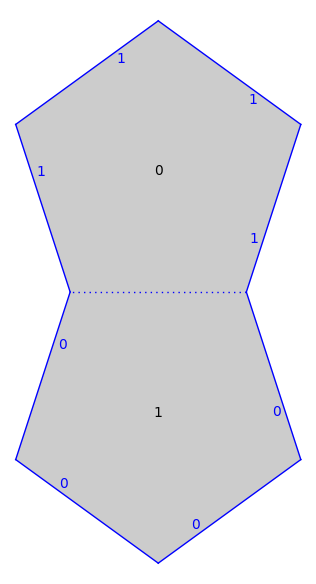

In [2]:
s = translation_surfaces.veech_double_n_gon(5).canonicalize()
s.plot()

In [3]:
p=s.polygon(0)
modulus = (p.vertex(3)[1]-p.vertex(2)[1])/(p.vertex(2)[0]-p.vertex(4)[0])
AA(modulus)

0.3632712640026804?

[1 2]
[0 1]

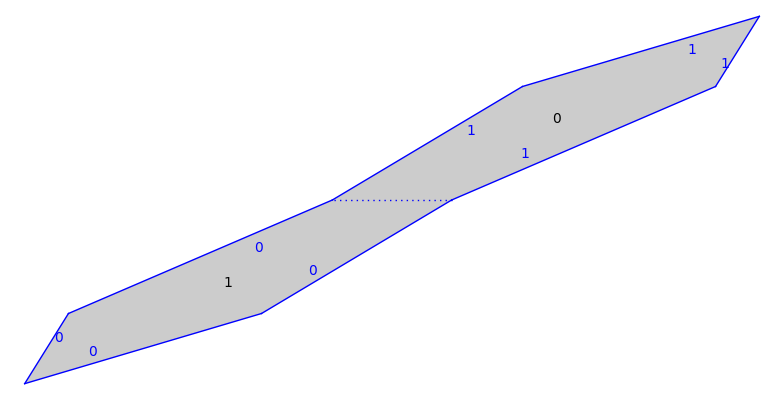

In [4]:
m = matrix(s.base_ring(),[[1,2],[0,1]])
show(matrix(AA,m))
ss = m*s
ss.plot()

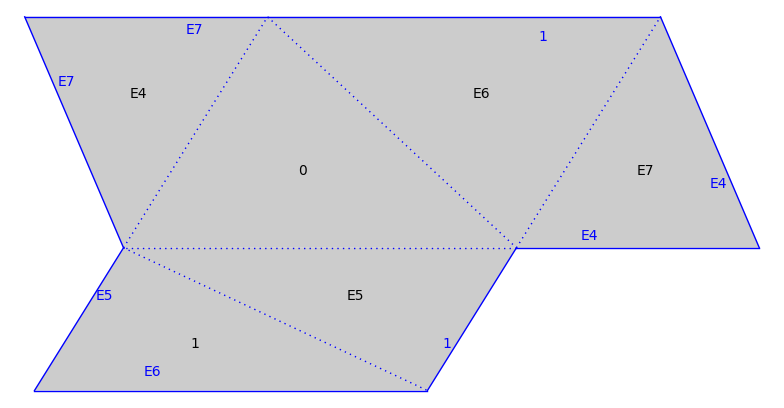

In [5]:
ss.delaunay_decomposition().plot()

The following checks that the matrix m stabilizes s:

In [6]:
ss.canonicalize()==s

False

## Geodesics

In [7]:
s = translation_surfaces.veech_double_n_gon(5)

The tangent bundle of the surface:

In [8]:
TB = s.tangent_bundle()

Define a tangent vector in polygon $0$ starting at $(\frac{1}{2},0)$ and pointed in some direction:

In [9]:
direction = s.polygon(0).vertex(2)+3*s.polygon(0).vertex(3)
v=TB(0, (1/2,0), direction)

Convert the vector to a straight-line trajectory.

In [10]:
traj=v.straight_line_trajectory()

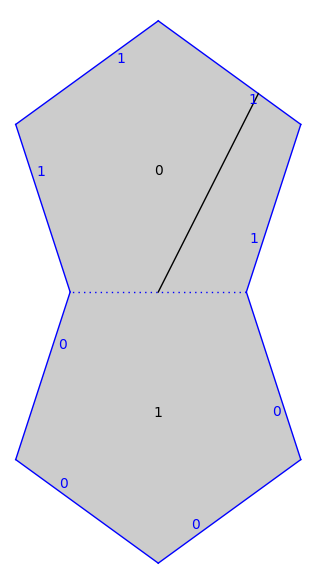

In [11]:
s.plot()+traj.plot()

True
40


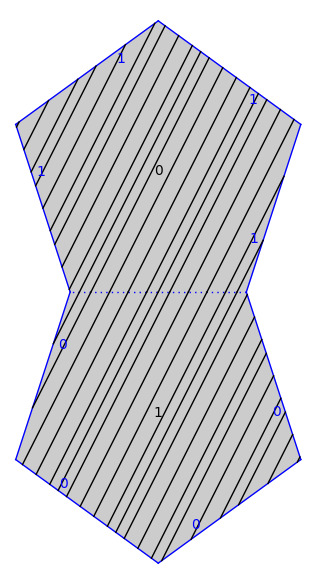

In [12]:
traj.flow(1000)
print(traj.is_closed())
print(traj.combinatorial_length())
s.plot()+traj.plot()

## Cone surfaces from polyhedra

Polyhedra are built into SAGE and you can use them to build a translation surface. In this Demo we only use a built in function for a Platonic Solid.

In [13]:
from flatsurf.geometry.polyhedra import *

In [14]:
polyhedron,s,mapping = platonic_dodecahedron()

In [15]:
polyhedron.plot(frame=False)

Graphics3d Object

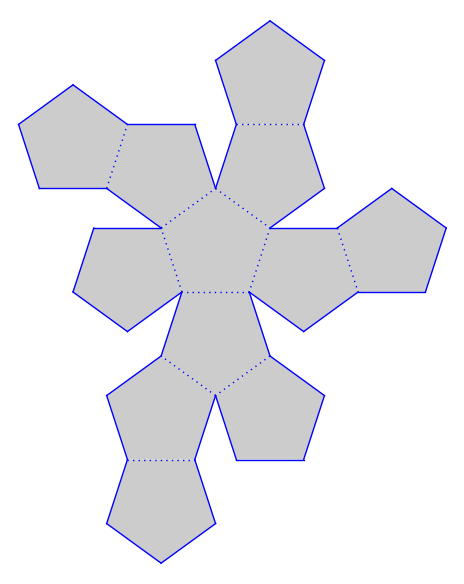

In [16]:
s.plot(polygon_labels=False,edge_labels=False)

In [17]:
TB = s.tangent_bundle()
direction = s.polygon(0).vertex(2)+2*s.polygon(0).vertex(3)
v=TB(0, (1/2,0), direction)
traj=v.straight_line_trajectory()
traj.flow(100)
print(traj.is_closed())
print(traj.combinatorial_length())

True
90


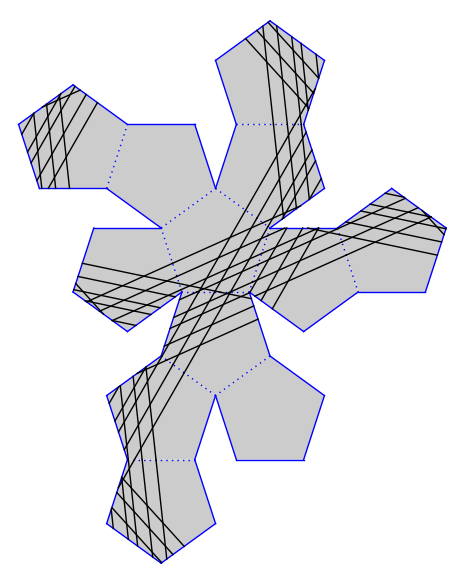

In [18]:
s.plot()+traj.plot()

In [19]:
polyhedron.plot(frame=False, point=False, line=False, wireframe=None)+line3d(mapping(traj),radius=0.02, frame=False)

Graphics3d Object

In [20]:
TB = s.tangent_bundle()
direction = s.polygon(0).vertex(2)+3*s.polygon(0).vertex(3)
v=TB(0, (1/2,0), direction)
traj=v.straight_line_trajectory()
traj.flow(1000)
print(traj.is_closed())
print(traj.combinatorial_length())

True
320


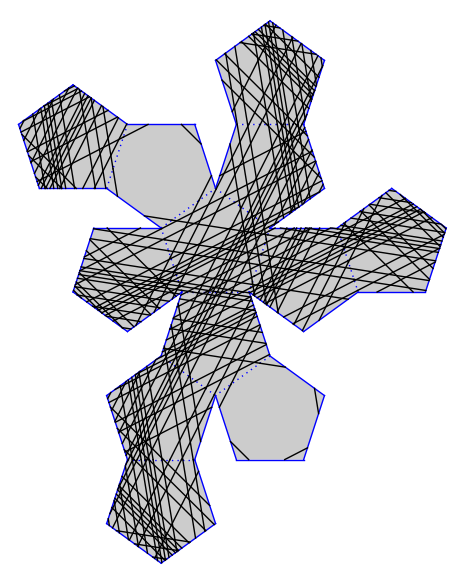

In [21]:
show(s.plot()+traj.plot())

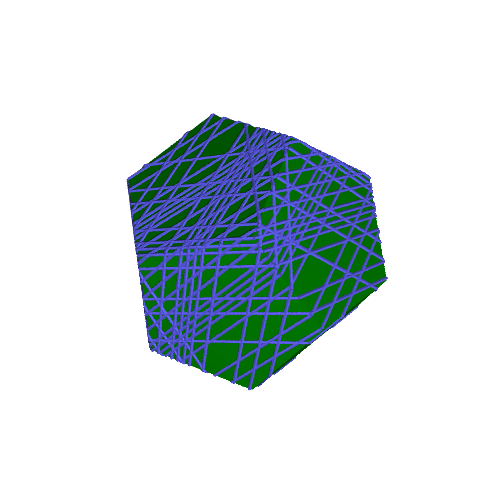

In [22]:
p = polyhedron.plot(frame=False, point=False, line=False, wireframe=None)+line3d(mapping(traj),radius=0.02, frame=False)
show(p,viewer='tachyon',frame=False)

## Relative period deformations

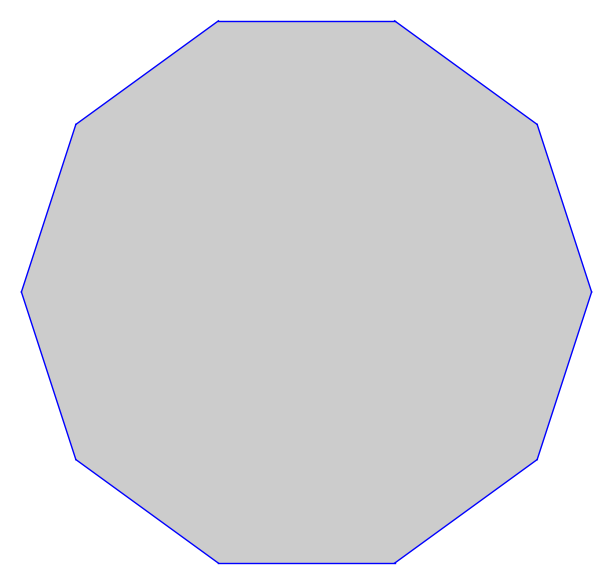

In [23]:
s = translation_surfaces.veech_2n_gon(5)
s.plot(edge_labels=False,polygon_labels=False)

Currently we have to triangulate to do a rel deformation.

In [24]:
s = s.triangulate().copy(relabel=True,mutable=True)

A singularity is an equivalence class of vertices of polygons.

In [25]:
sing = s.singularity(0,0)
sing

singularity with vertex equivalence class frozenset([(3, 2), (0, 0), (7, 1), (2, 1), (6, 2), (5, 1), (1, 0), (4, 0), (0, 1), (7, 0), (6, 1), (3, 1), (5, 0), (2, 2), (4, 1), (1, 1)])

We can now deform by moving one singularity relative to the others. Here is a small deformation in the slope one direction.

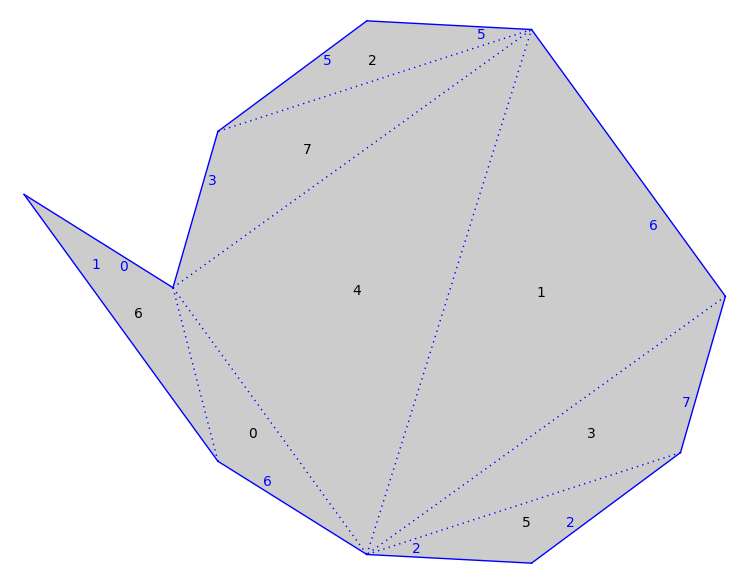

In [26]:
ss=s.rel_deformation({sing:vector(s.base_ring(),(1/20,1/20))})
ss.plot()

A larger deformation:

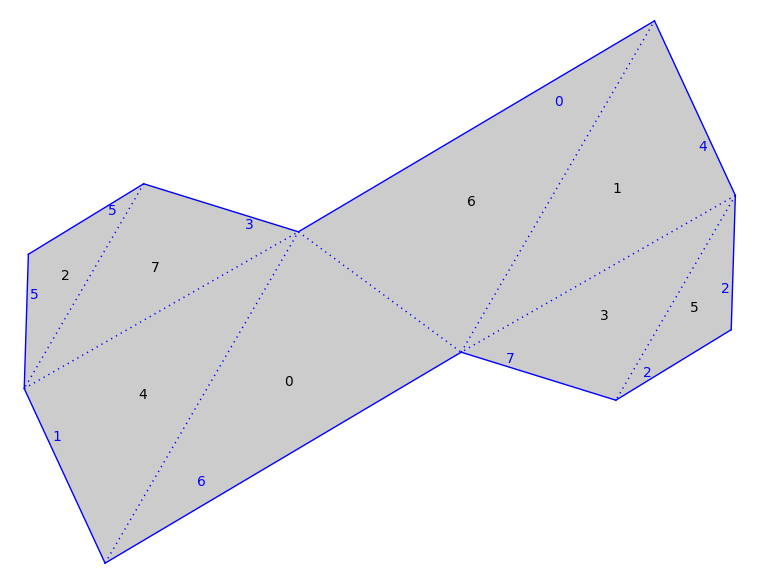

In [27]:
ss=s.rel_deformation({sing:vector(s.base_ring(),(100,100))})
ss.plot()

## The Necker Cube Surface

I'm demonstrating a result (in progress) of Pavel Javornik, an undergraduate at City College of New York.

In [28]:
from flatsurf.geometry.straight_line_trajectory import StraightLineTrajectory

class SurfaceToSpaceMapping(SageObject):
    def __init__(self, similarity_surface, tranformation):
        self._s=similarity_surface
        from types import FunctionType
        if isinstance(transformation,FunctionType):
            self.transformation=transformation
        
    def transformation(self, label):
        r"""
        Return a pair (m,t) where m is a 3x2 matrix and v is a vector with 3 entries.
        The associated tranformation from the polygon with the given label is v mapsto
        m*v+t where v is a point in the polygon.
        """
        return self._t[label]
    
    def image_polygon(self,label):
        r"""
        Return a 2-dimensional polyhedron in 3-space representing the image of the polygon with the given label.
        """
        p = self._s.polygon(label)
        m,t = self.transformation(label)
        vertices = [ m*v+t for v in p.vertices() ]
        return Polyhedron(vertices=vertices)
    
    def plot(self, labels, point=False, line=False, polygon=None, wireframe=None, frame=False, label_to_color=None):
        r"""
        Return a 3d plot of the polygonal images in 3-space corresponding to the collection of labels.
        The other parameters are passed to a Polyhedron.plot method and affect the rendering.
        """
        it = iter(labels)
        label = it.next()
        if label_to_color is None:
            p = self.image_polygon(label).plot(point=point, line=line, polygon=polygon, \
                                               wireframe=wireframe,frame=frame,color="pink")
        else:
            p = self.image_polygon(label).plot(point=point, line=line, polygon=polygon, \
                                               wireframe=wireframe,frame=frame,color=label_to_color(label))            
        for label in it:
            if label_to_color is None:
                p += self.image_polygon(label).plot(point=point, line=line, polygon=polygon, \
                                                   wireframe=wireframe,frame=frame,color="pink")
            else:
                p += self.image_polygon(label).plot(point=point, line=line, polygon=polygon, \
                                                   wireframe=wireframe,frame=frame,color=label_to_color(label)) 
        from sage.modules.free_module_element import vector
        p.frame_aspect_ratio(tuple(vector(p.bounding_box()[1])-vector(p.bounding_box()[0])))
        return p

    def __call__(self,o):
        r"""
        This method is used to convert from an object on the surface to an object in space.
        
        Currently works with 
        - StraightLineTrajectory -- returns the corresponding list of points in space
        - SegmentInPolygon -- returns the corresponding pair of points in space
        - SimilaritySurfaceTangentVector -- returns a pair of points corresponding to the image point and image of the tangent vector.
        """
        
        if isinstance(o, StraightLineTrajectory):
            points=[]
            it = iter(o.segments())
            s=it.next()
            label = s.polygon_label()
            m,t = self.transformation(label)
            
            points.append(t + m*s.start().point())
            points.append(t + m*s.end().point())
            for s in it:
                label = s.polygon_label()
                m,t = self.transformation(label)
                points.append(t + m*s.end().point())
            return points
        if isinstance(o, SegmentInPolygon):
            # Return the pair of images of the endpoints.
            label = o.polygon_label()
            m,t = self.transformation(label)
            return ( t+m*o.start().point(), t+m*o.end().point() )
        if isinstance(o,SimilaritySurfaceTangentVector):
            # Map to a pair of vectors consisting of the image of the basepoint and the image of the vector.
            label = o.polygon_label()
            m,t = self.transformation(label)
            point = o.point()
            vector = o.vector()
            return (t + m*point, m*vector)
        raise ValueError("Failed to recognize type of passed object")    

In [29]:
from flatsurf.geometry.surface import Surface
from flatsurf.geometry.polygon import Polygons
from flatsurf.geometry.similarity import SimilarityGroup
class CubeSurf(Surface):
    def __init__(self,F):
        ZZ3=IntegerModRing(3)
        P=Polygons(F)
        self._faceA=P(vertices=[(0,0),(1,0),(1,1),(0,1)])
        self._faceB=P(vertices=[(0,0),(1,0),(1,1),(0,1)])
        self._faceC=P(vertices=[(0,0),(1,0),(1,1),(0,1)])
        Surface.__init__(self,F,(ZZ(0),ZZ(0),ZZ3(0)), finite=False)
    def polygon(self, label):
        x,y,l=label
        if l==0:
            return self._faceA
        if l==1:
            return self._faceB
        if l==2:
            return self._faceC
    def opposite_edge(self,label,edge):
        x,y,l=label
        ## l(0)=A l(1)=B l(2)=C
        if l==0:
            if edge==0:
                return((x,y-1,l+2),2)
            if edge==1:
                return((x,y,l+1),3)
            if edge==2:
                return((x,y,l+2),0)
            if edge==3:
                return((x-1,y,l+1),1)
        if l==1:
            if edge==0:
                return((x+1,y-1,l+1),3)
            if edge==1:
                return((x+1,y,l+2),3)
            if edge==2:
                return((x,y,l+1),1)
            if edge==3:
                return((x,y,l+2),1)
        if l==2:
            if edge==0:
                return((x,y,l+1),2)
            if edge==1:
                return((x,y,l+2),2)
            if edge==2:
                return((x,y+1,l+1),0)
            if edge==3:
                return((x-1,y+1,l+2),0)
SG=SimilarityGroup(QQ)
def default_position(label):
    x,y,l = label
    if(ZZ(l)==0):
        return SG(2*x,2*y) #(b+c)x,(a+c)y
    if(ZZ(l)==1):
        return SG(2*x+1,2*y) #(b+c)x + c, (a+c)y
    if(ZZ(l)==2):
        return SG(2*x,2*y+1) #(b+c)x, (a+c)y + c
    ##Reminder to parameterize a,b,c here for positions.
    ##Rework this to work for surfaces of different sizes.

In [30]:
s=SimilaritySurface(CubeSurf(QQ))

In [31]:
MM=matrix(QQ,[
    [0,1,0],
    [-1,0,0],
    [0,0,1]
])
def transformation(label):
    M=MatrixSpace(QQ,3,2)
    V=VectorSpace(QQ,3)
    x,y,l=label
    if l==0:
        return MM*M([[1,0],[0,1],[0,0]]),MM*V([x,y,-x-y])
    elif l==1:
        return MM*M([[0,0],[0,1],[-1,0]]),MM*V([x+1,y,-x-y])
    else: # l==2
        return MM*M([[1,0],[0,0],[0,-1]]),MM*V([x,y+1,-x-y])
m=SurfaceToSpaceMapping(s,transformation)
def label_to_color(label):
    if label[2]==0:
        return "pink"
    if label[2]==1:
        return "yellow"
    if label[2]==2:
        return "beige"

In [32]:
it = s.label_iterator()
m.plot({it.next() for i in xrange(30)},label_to_color=label_to_color)

Graphics3d Object

<b>Theorem (Pavel Javornik)</b> A trajectory of rational slope (measured on one of the squares interpretted tohave horizontal and vertical sides) on the Necker Cube Surface closes up if and only if the slope can be expressed as the ratio of two odd integers.

In [33]:
B=s.tangent_bundle()

The following builds a trajectory starting in the base polygon at the point $(\frac{1}{4}, \frac{1}{4})$ and traveling in a direction of slope one.

In [34]:
v=B(s.base_label(),(1/4,1/4),(-1,1))
traj=v.straight_line_trajectory()
traj.flow(100)
if traj.is_closed():
    print("The trajectory closed up.")
labels=[seg.polygon_label() for seg in traj.segments()]
m.plot(labels,label_to_color=label_to_color)+line3d(m(traj),radius=0.02)

The trajectory closed up.


Graphics3d Object

A trajectory of slope $5/4$.

In [35]:
v=B(s.base_label(),(1/3,1/4),(4,5))
traj=v.straight_line_trajectory()
traj.flow(50)
labels=[seg.polygon_label() for seg in traj.segments()]
p=m.plot(labels,label_to_color=label_to_color)+line3d(m(traj),radius=0.04,label_to_color=label_to_color)
p.frame_aspect_ratio(tuple(vector(p.bounding_box()[1])-vector(p.bounding_box()[0])))
p

Graphics3d Object

A trajectory of slope $11/9$

In [36]:
v=B(s.base_label(),(1/3,1/4),(9,11))
traj=v.straight_line_trajectory()
traj.flow(1000)
while not traj.is_closed():
    traj.flow(1000)
labels=[seg.polygon_label() for seg in traj.segments()]
p=m.plot(labels,label_to_color=label_to_color)+line3d(m(traj),radius=0.04)
#p

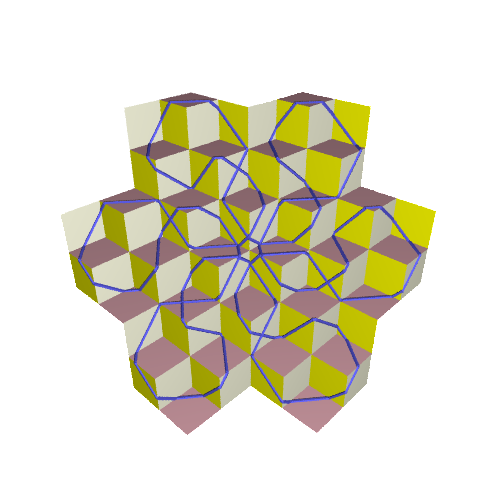

In [37]:
show(p,frame=False,viewer="tachyon")

In [38]:
#show(p,frame=False)